In [1]:
import numpy as np
import processi_EMGIT as em
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.stattools import acf, pacf,adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
%matplotlib inline

*Simulazione di geometic brownian motion con volatilità data dal valore assoluto di un un wiener process*

In [27]:
#23400 realized volatilities

s=em.gbm_mod(100,1,23400)
r2=em.calcolaRendimenti(s[0],len(s[0]))
f=em.realVol(r2,1,23400)
diff=np.zeros(len(f))
for i in range(len(f)):
    diff[i]=(np.log(s[1][i])-np.log(f[i]))


In [3]:
#78realized volatilities
s=em.gbm_mod(100,1,23400)
r2=em.calcolaRendimenti(s[0],len(s[0]))
rv=em.realVol(r2,300,23400)
d=np.zeros(len(rv))
for (i,j) in zip(range(0,len(s[0]),300),range(len(rv))):
    d[j]=(rv[j]-s[1][i])

<Figure size 1440x720 with 0 Axes>

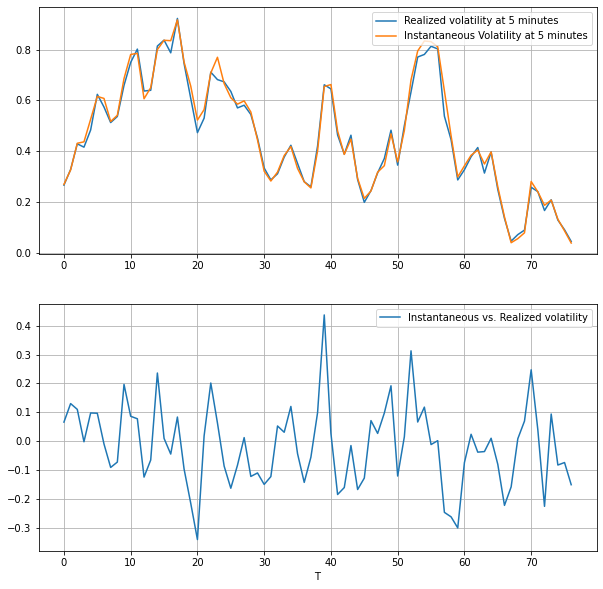

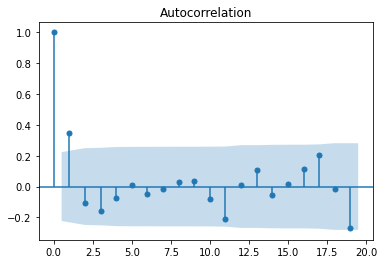

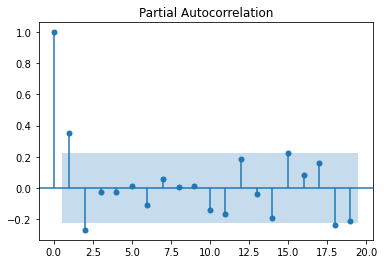

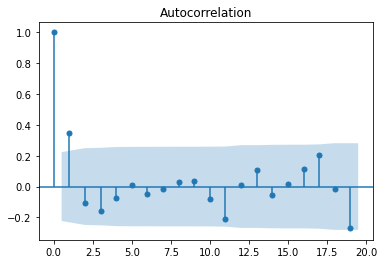

In [4]:
#78 realized volatilities
xx=[x for x in range(len(rv))]
z=s[1].reshape(-1,300).mean(axis=1)

plt.figure(figsize=(20, 10))
fig, axs = plt.subplots(2,figsize=(10,10))
#fig.suptitle('Realized Volatility (blue) at a 5 minute parsing and Instantaneous Volatility (orange)')
#fig.inftitle("Differences: RV-sigma")

axs[0].plot(xx, rv,label="Realized volatility at 5 minutes")
axs[0].plot(xx, z[1:],label="Instantaneous Volatility at 5 minutes")
axs[0].legend(loc="upper right"); plt.xlabel("T")#z,s[1][:-1]
axs[0].grid(True)
axs[1].plot(d,label="Instantaneous vs. Realized volatility")
axs[1].legend(loc="upper right"); plt.xlabel("T")#z,s[1][:-1]
axs[1].grid(True)
plt.show()
plot_pacf(d)
plot_acf(d)

In [5]:
xx=[x for x in range(len(f))]
data=pd.DataFrame(f,index=xx)
#data[data[0]<1e-4].replace(data.mean(),inplace=True)
data.replace([data[0]<1e-4],data.mean(),inplace=True)

In [6]:
#z=f.mean()
#for i in range(len(f)):
#    if (f[i]<1e-5):
#        f[i]=z
#plt.plot(f)
#plt.show()

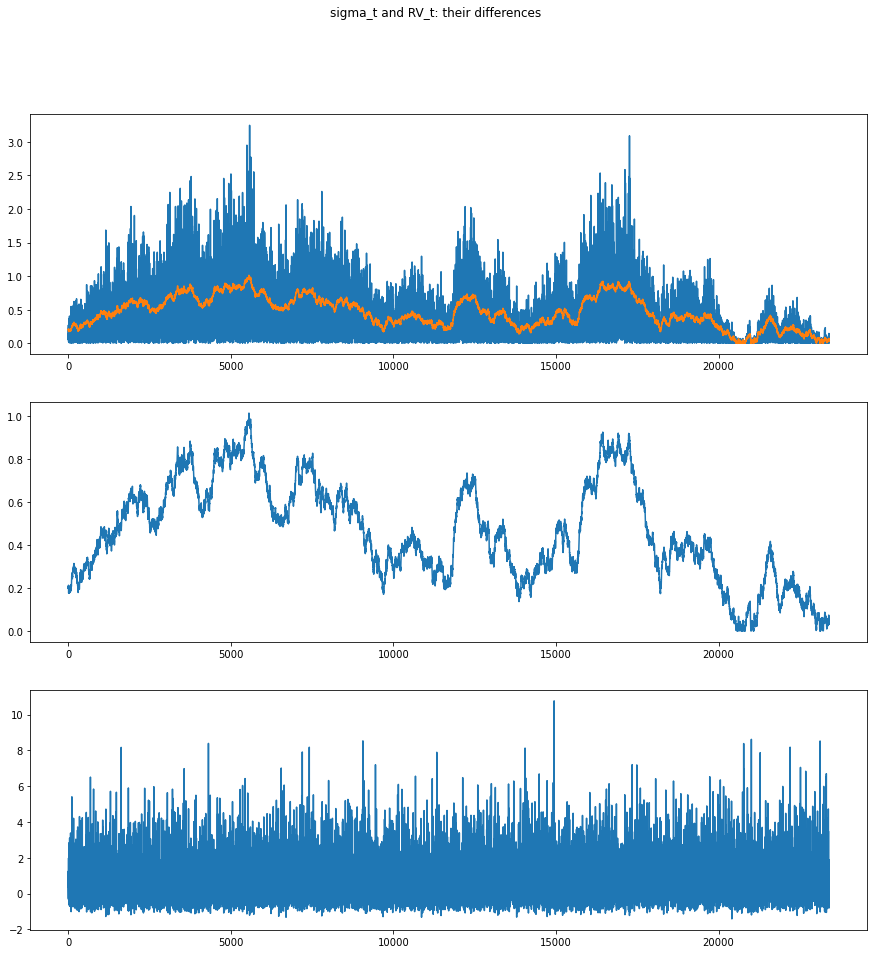

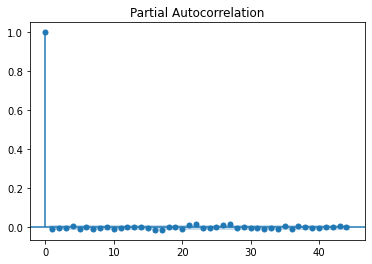

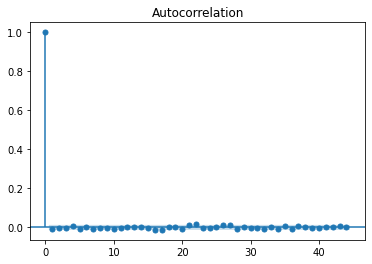

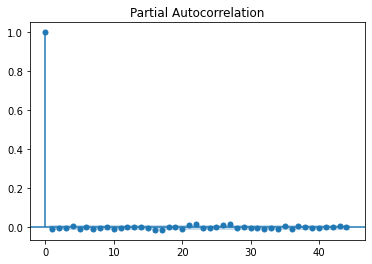

In [28]:
#23400 realized volatilities
xx=[x for x in range(len(f))]
z=s[1].reshape(-1,10).mean(axis=1)
fig, axs = plt.subplots(3,figsize=(15,15))
fig.suptitle('sigma_t and RV_t: their differences')
axs[0].plot(xx,f,xx,s[1][:-1])#z
axs[1].plot(s[1])
axs[2].plot(diff)

plt.show()
plot_acf(diff)
plot_pacf(diff)

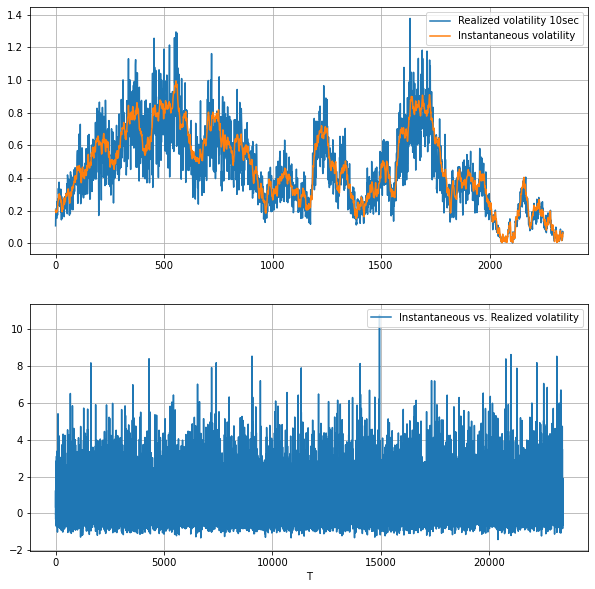

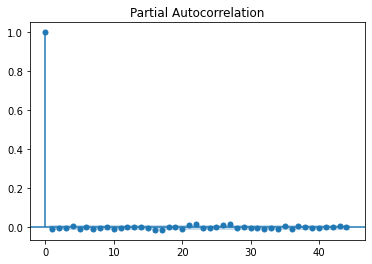

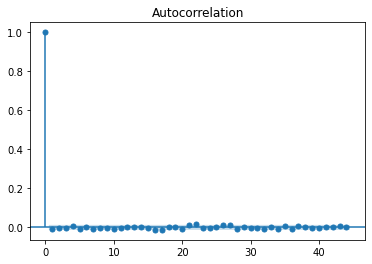

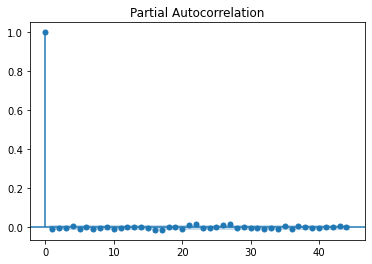

In [29]:
r2=em.calcolaRendimenti(s[0],len(s[0]))
f=em.realVol(r2,10,23400)
xx=[x for x in range(len(f))]
z=s[1].reshape(-1,10).mean(axis=1)
fig, axs = plt.subplots(2,figsize=(10,10))
#fig.suptitle('sigma_t and RV_t: their differences')
axs[0].plot(xx,f,label="Realized volatility 10sec")
axs[0].plot(xx,z[:-1],label="Instantaneous volatility")
axs[0].legend(loc="upper right"); plt.xlabel("T")#z,s[1][:-1]
axs[0].grid(True)
#axs[1].plot(s[1])
axs[1].plot(diff,label="Instantaneous vs. Realized volatility")
axs[1].legend(loc="upper right"); plt.xlabel("T")
axs[1].grid(True)

plt.show()
plot_acf(diff)
plot_pacf(diff)

In [ ]:
adj=em.gbm_mod_adj(100,1,23400)
r2adj=em.calcolaRendimenti(adj[0],len(adj[0]))
fadj=em.realVol(r2adj,5,23400)#em.RV(adj[0],23400)#
z=adj[1].reshape(-1,5).mean(axis=1)
plt.plot(fadj*0.25)
plt.plot(z)
plt.show()
plt.plot(adj[0])
#plt.plot(s[0])
plt.show()
diff=np.zeros(len(fadj))
for i in range(len(fadj)):
    diff[i]=(np.log(adj[1][i])-np.log(fadj[i]))
plt.plot(diff)
plt.show()
plot_acf(diff)
plot_pacf(diff)

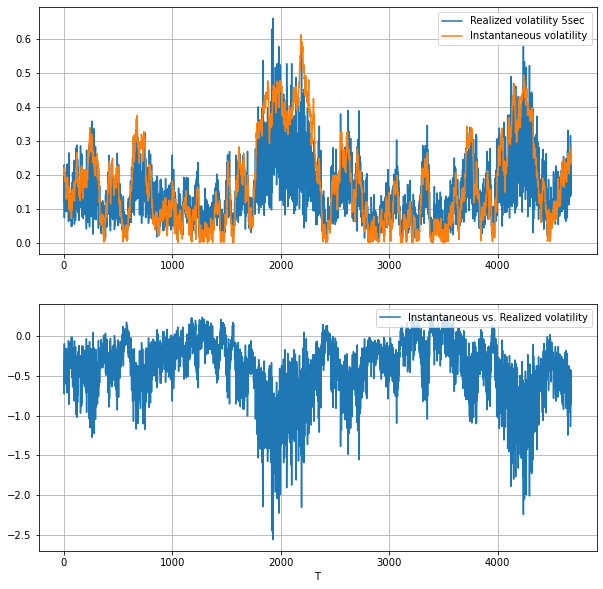

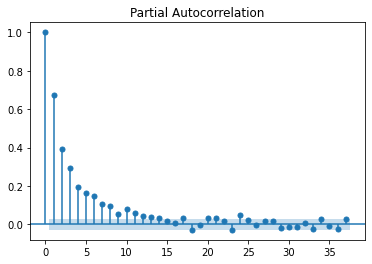

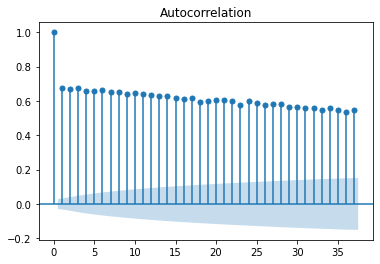

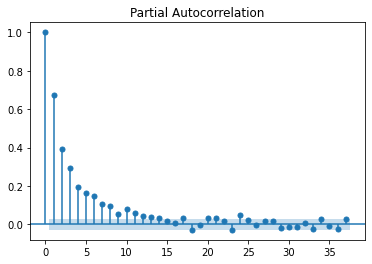

In [19]:
fig, axs = plt.subplots(2,figsize=(10,10))
#fig.suptitle('sigma_t and RV_t: their differences')
axs[0].plot(fadj*0.25,label="Realized volatility 5sec")
axs[0].plot(z[:-1],label="Instantaneous volatility")
axs[0].legend(loc="upper right"); plt.xlabel("T")#z,s[1][:-1]
axs[0].grid(True)
#axs[1].plot(s[1])
axs[1].plot(diff,label="Instantaneous vs. Realized volatility")
axs[1].legend(loc="upper right"); plt.xlabel("T")
axs[1].grid(True)

plt.show()
plot_acf(diff)
plot_pacf(diff)


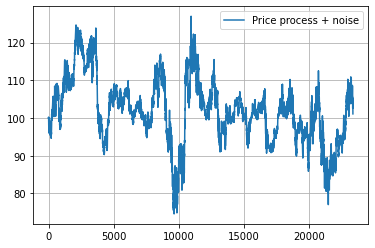

In [17]:
plt.plot(adj[0],label="Price process + noise")
plt.grid(True)
plt.legend(loc="upper right")
plt.show()